In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize
from model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "mylogs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
COCO_DIR = "D:/Github/FastMaskRCNN/data/coco"  # TODO: enter value here
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

d:\programdata\anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    KEYPOINT_MASK_POOL_SIZE = 7

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights

model_path = os.path.join(ROOT_DIR, "mask_rcnn_coco_humanpose.h5")
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  D:\Github\Mask_RCNN_Humanpose\mask_rcnn_coco_humanpose.h5


Processing 1 images
image                    shape: (491, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 10)               min:    0.00000  max: 1024.00000
windows                  shape: (1, 4)                min:    0.00000  max: 1024.00000
rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 261888, 4)        min:   -9.73251  max:  134.00014
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    0.99999
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -3.75967  max:    3.91079
detections               shape: (1, 100, 6)           min:    0.00000  max: 1013.00000
mrcnn_mask               shape: (1, 100, 28, 28, 2)   min:    0.00001  max:    0.99921
mrcnn_keypoint_prob    

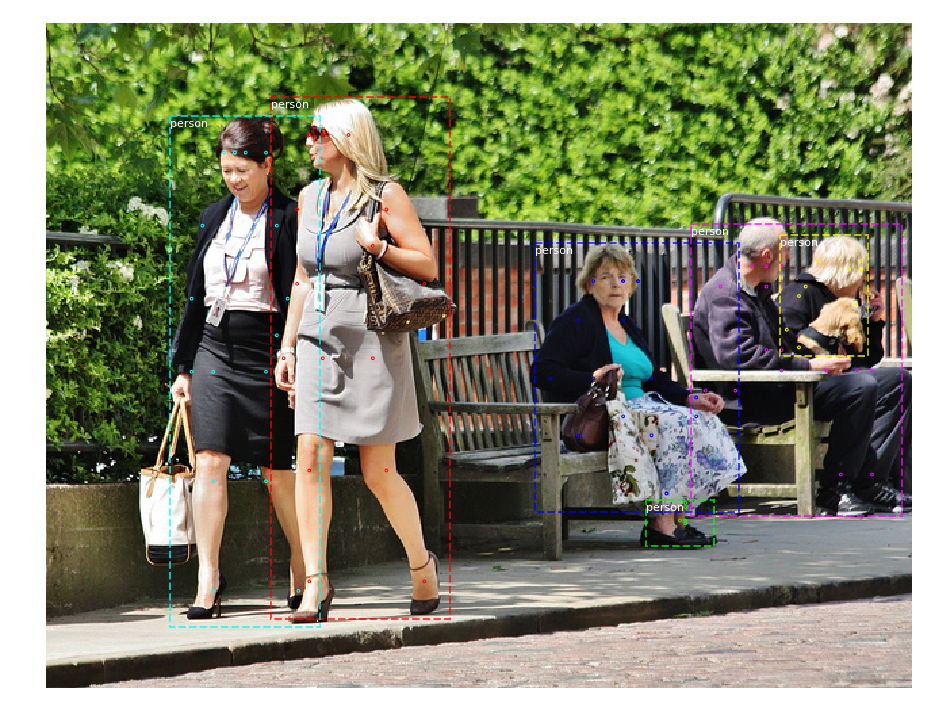

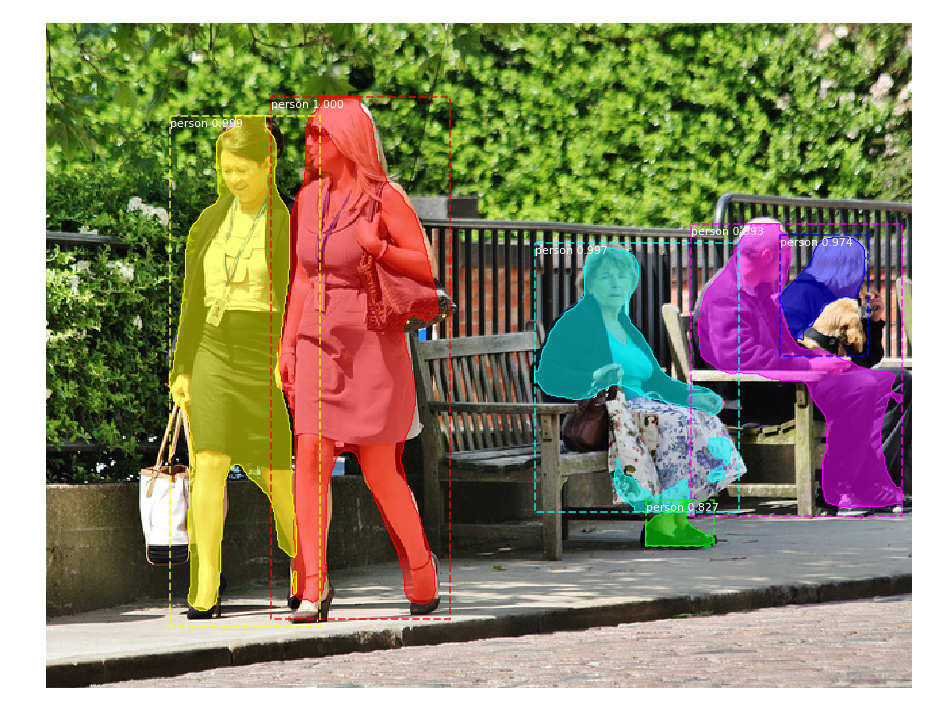

In [17]:
import cv2
# COCO Class names
#For human pose task We just use "BG" and "person"
class_names = ['BG', 'person']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
#BGR->RGB
image = image[:,:,::-1]

# Run detection
results = model.detect_keypoint([image], verbose=1)
r = results[0] # for one image

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
log("scores",r['scores'])

visualize.display_keypoints(image,r['rois'],r['keypoints'],r['class_ids'],class_names)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])